In [1]:
#Use 13-long gene-diffmat corr to predict symptoms 
#Plot beta-weights (use 13 corr with cmat as control) 
#See symptoms prediction accuracy (diff > cmat)

In [2]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
import ants
import os
from tqdm import tqdm
import statistics
import statsmodels.api as sm

In [3]:
cd ../Data/Genemaps

/mmfs1/data/pijarj/BC-ORG-Data/Data/Genemaps


In [4]:
#read in symptom patient data and slice out important columns
df = pd.read_csv('/mmfs1/data/pijarj/Data4Julianna/df_patients_S699.csv')
df.columns
df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']]

,ados_total,ados_comm,ados_social,ados_rrb
0,18.0,6.0,12.0,2.0
1,NaN,NaN,NaN,NaN
2,13.0,4.0,9.0,NaN
3,12.0,4.0,8.0,2.0
4,16.0,5.0,11.0,3.0
...,...,...,...,...
694,NaN,NaN,NaN,NaN
695,NaN,NaN,NaN,NaN
696,13.0,4.0,9.0,2.0
697,8.0,2.0,6.0,2.0


In [5]:
df.shape

(699, 36)

In [6]:
#load in diffmat data
diffmat = np.load('/mmfs1/data/pijarj/Data4Julianna/recon_asd_diffmats.npz')
diffmat = diffmat['data']
diffmat.shape

(699, 51, 51)

In [7]:
atlas = ants.image_read('../../YeoAtlas/Atlas_parc-7n_2mm.nii')

In [8]:
genemaps = [file for file in os.listdir() if file.endswith('.nii.gz')]
genemaps.sort()

In [9]:
nsubjects = 699
ngenes = len(genemaps)
print(nsubjects)
print(ngenes)

gene_fmri_corr = np.zeros((ngenes,nsubjects))
gene_fmri_corr

699
13


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
for g in tqdm(range(ngenes)):
    gene_im = ants.image_read(genemaps[g])
    gene_flat = gene_im.numpy().flatten()
    atlas_flat = atlas.numpy().flatten()
    roi_expression = np.array([gene_flat[atlas_flat==roi].mean() for roi in np.arange(1,52)])
    gene_sim = np.zeros((51,51))
    for i in range(51):
        for j in range(51):
            gene_sim[i,j] = abs(roi_expression[i]-roi_expression[j])

    triu = np.triu_indices(51,k=1)
    gene_vec = gene_sim[triu]

    for s in range(nsubjects):
        subject_diffmat = diffmat[s,:,:] # correlation matrices for one subject
        fmri_vec = subject_diffmat[triu]
        data = np.corrcoef(gene_vec,fmri_vec)[0,1]
        gene_fmri_corr[g,s] = data

100%|██████████| 13/13 [00:02<00:00,  5.64it/s]


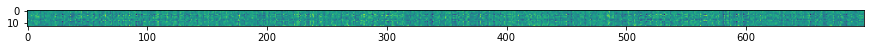

In [11]:
plt.figure(figsize=(15,10))
plt.imshow(gene_fmri_corr)

In [12]:
gene_fmri_corr.shape

(13, 699)

In [13]:
col_id = 0
Y_total = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_total = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])

good_subjects_total = ~np.isnan(Y_total)[:,col_id]

Y_use_total = Y_total[good_subjects_total,col_id] 

X_use_total = gene_fmri_corr[:,good_subjects_total]
X_use_total = X_use_total.transpose()

regression_total =  linear_model.LinearRegression(normalize=True)
linear_regression_total = regression_total.fit(X_use_total,Y_use_total) 

Y_use_hat_total = linear_regression_total.predict(X_use_total)

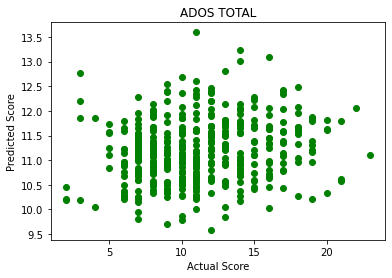

In [14]:
#scatter plot for ados_total
plt.scatter(Y_use_total,Y_use_hat_total,color='green')
plt.title('ADOS TOTAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [15]:
col_id = 1
Y_comm = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_comm = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_comm = ~np.isnan(Y_comm)[:,col_id]
Y_use_comm = Y_comm[good_subjects_comm,col_id] 
X_use_comm = gene_fmri_corr[:,good_subjects_comm]
X_use_comm = X_use_comm.transpose()
regression_comm =  linear_model.LinearRegression(normalize=True)
linear_regression_comm = regression_comm.fit(X_use_comm,Y_use_comm) 
Y_use_hat_comm = linear_regression_comm.predict(X_use_comm)

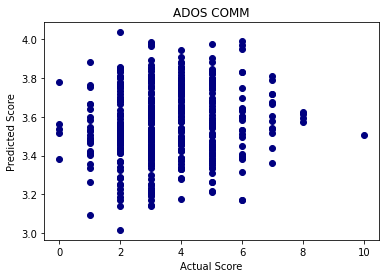

In [16]:
#scatter plot for ados_comm
plt.scatter(Y_use_comm,Y_use_hat_comm,color='navy')
plt.title('ADOS COMM')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [17]:
col_id = 2
Y_social = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_social = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_social = ~np.isnan(Y_social)[:,col_id]
Y_use_social = Y_social[good_subjects_social,col_id] 
X_use_social = gene_fmri_corr[:,good_subjects_social]
X_use_social = X_use_social.transpose()
regression_social =  linear_model.LinearRegression(normalize=True)
linear_regression_social = regression_social.fit(X_use_social,Y_use_social) 
Y_use_hat_social = linear_regression_social.predict(X_use_social)

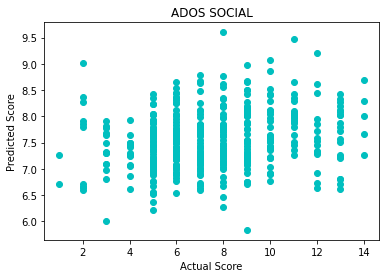

In [18]:
#scatter plot for ados_social
plt.scatter(Y_use_social,Y_use_hat_social,color='c')
plt.title('ADOS SOCIAL')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [19]:
col_id = 3
Y_rrb = df[['ados_total', 'ados_comm', 'ados_social', 'ados_rrb']].values
column_rrb = (['ados_total', 'ados_comm', 'ados_social', 'ados_rrb'][col_id])
good_subjects_rrb = ~np.isnan(Y_rrb)[:,col_id]
Y_use_rrb = Y_rrb[good_subjects_rrb,col_id] 
X_use_rrb = gene_fmri_corr[:,good_subjects_rrb]
X_use_rrb = X_use_rrb.transpose()
regression_rrb =  linear_model.LinearRegression(normalize=True)
linear_regression_rrb = regression_rrb.fit(X_use_rrb,Y_use_rrb) 
Y_use_hat_rrb = linear_regression_rrb.predict(X_use_rrb)

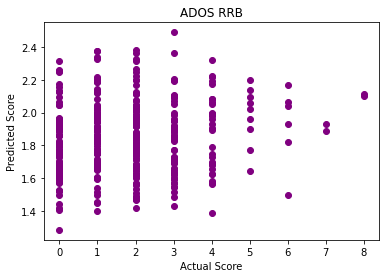

In [20]:
#scatter plot for ados_rrb
plt.scatter(Y_use_rrb,Y_use_hat_rrb,color='purple')
plt.title('ADOS RRB')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

In [21]:
#variance explained for ados_total
from sklearn.metrics import explained_variance_score
total = explained_variance_score(Y_use_total,Y_use_hat_total)*100
print(total)

2.651116934212927


In [22]:
#variance explained for ados_comm
from sklearn.metrics import explained_variance_score
comm = explained_variance_score(Y_use_comm,Y_use_hat_comm)*100
print(comm)

1.369006035359288


In [23]:
#variance explained for ados_social
from sklearn.metrics import explained_variance_score
social = explained_variance_score(Y_use_social,Y_use_hat_social)*100
print(social)

4.331740939194462


In [24]:
#variance explained for ados_rrb
from sklearn.metrics import explained_variance_score
rrb = explained_variance_score(Y_use_rrb,Y_use_hat_rrb)*100
print(rrb)

2.0557265540216085


Text(0.5, 0, 'Symptom')

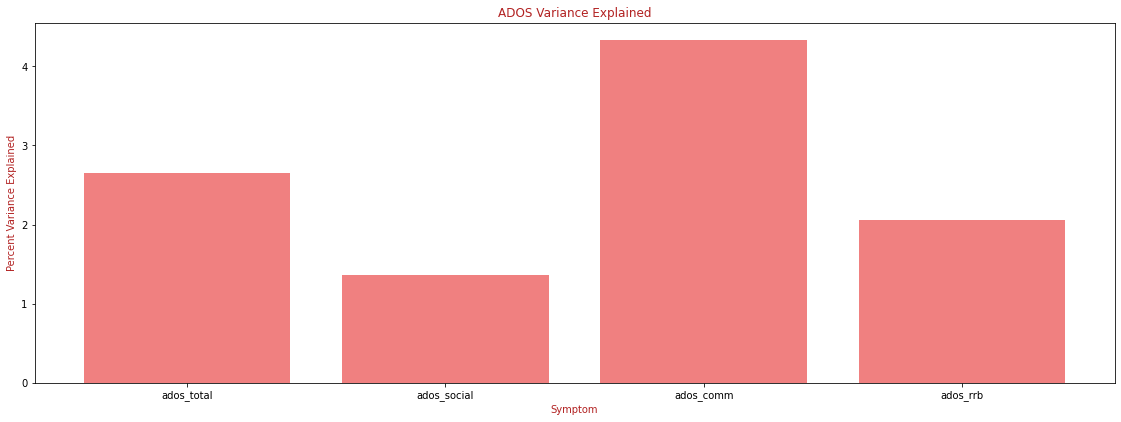

In [25]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ados_label = ['ados_total','ados_social','ados_comm','ados_rrb']
var_explained = total, comm, social, rrb
plt.bar(ados_label,var_explained,color='lightcoral')
plt.title('ADOS Variance Explained',color='firebrick')
plt.ylabel('Percent Variance Explained',color='firebrick')
plt.xlabel('Symptom',color='firebrick')

In [26]:
#correlation coefficents for ados_total
coefficient_total = regression_total.coef_
labels = ['NLGN4Y', 'POGZ', 'FMR1', 'CNTNAP2', 'NLGN3','NLGN4X', 'MECP2', 'MET', 'OXTR', 'RELN','SHANK3', 'SLC6A4', 'NRXN1']
print(column_total)
print()
for i in range(0,13):
    print(f'{labels[i]},{coefficient_total[i]}')

ados_total

NLGN4Y,-12.162957127918375
POGZ,-4.388783843158301
FMR1,5.690059081352753
CNTNAP2,4.4417833940699545
NLGN3,-3.2014188909157144
NLGN4X,-1.6916949878879142
MECP2,4.002212381346231
MET,0.7904133923030469
OXTR,2.32897755697988
RELN,4.409249520973453
SHANK3,1.282086436105105
SLC6A4,3.610673945733059
NRXN1,-2.366335969493219


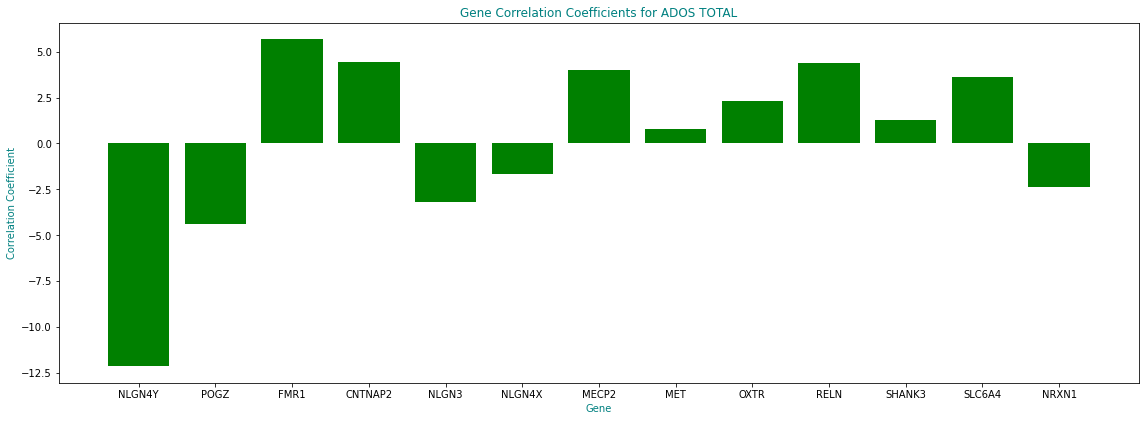

In [27]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_total,color='green')
plt.title('Gene Correlation Coefficients for ADOS TOTAL',color='teal')
plt.ylabel('Correlation Coefficient',color='teal')
plt.xlabel('Gene',color='teal')
plt.show()

In [28]:
#correlation coefficents for ados_comm
coefficient_comm = regression_comm.coef_
labels = ['NLGN4Y', 'POGZ', 'FMR1', 'CNTNAP2', 'NLGN3','NLGN4X', 'MECP2', 'MET', 'OXTR', 'RELN','SHANK3', 'SLC6A4', 'NRXN1']
print(column_comm)
print()
for i in range(0,13):
    print(f'{labels[i]},{coefficient_comm[i]}')

ados_comm

NLGN4Y,-1.0459985398891152
POGZ,0.4416499274701452
FMR1,0.8676739276128245
CNTNAP2,-0.03576914448953731
NLGN3,-0.02514412607104068
NLGN4X,1.9137141436651965
MECP2,-0.21080521919493042
MET,0.41651689879626635
OXTR,0.8377970017771396
RELN,0.7388025614186521
SHANK3,-1.934773715552239
SLC6A4,1.085506048225736
NRXN1,-0.3489912999635063


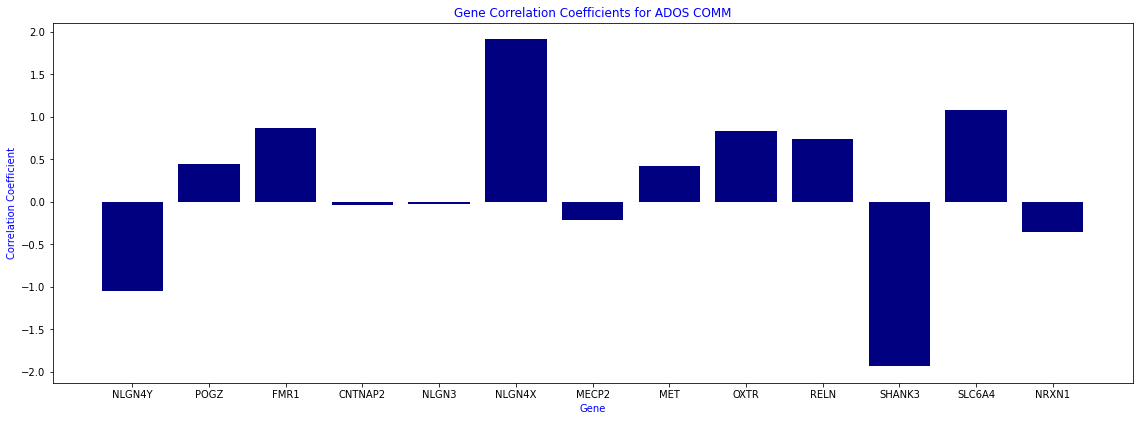

In [29]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_comm,color='navy')
plt.title('Gene Correlation Coefficients for ADOS COMM',color='b')
plt.ylabel('Correlation Coefficient',color='b')
plt.xlabel('Gene',color='b')
plt.show()

In [30]:
#correlation coefficents for ados_social
coefficient_social = regression_social.coef_
labels = ['NLGN4Y', 'POGZ', 'FMR1', 'CNTNAP2', 'NLGN3','NLGN4X', 'MECP2', 'MET', 'OXTR', 'RELN','SHANK3', 'SLC6A4', 'NRXN1']
print(column_social)
print()
for i in range(0,13):
    print(f'{labels[i]},{coefficient_social[i]}')

ados_social

NLGN4Y,-10.19251810368778
POGZ,-4.108129804137099
FMR1,5.1762636158632365
CNTNAP2,3.509348071857971
NLGN3,-3.0533951817935483
NLGN4X,-3.6540614773203832
MECP2,3.63208463744494
MET,0.46627934915220276
OXTR,2.0933506053947615
RELN,4.2237793382214806
SHANK3,1.5632638471674585
SLC6A4,3.6362813304514314
NRXN1,-1.9123520034052086


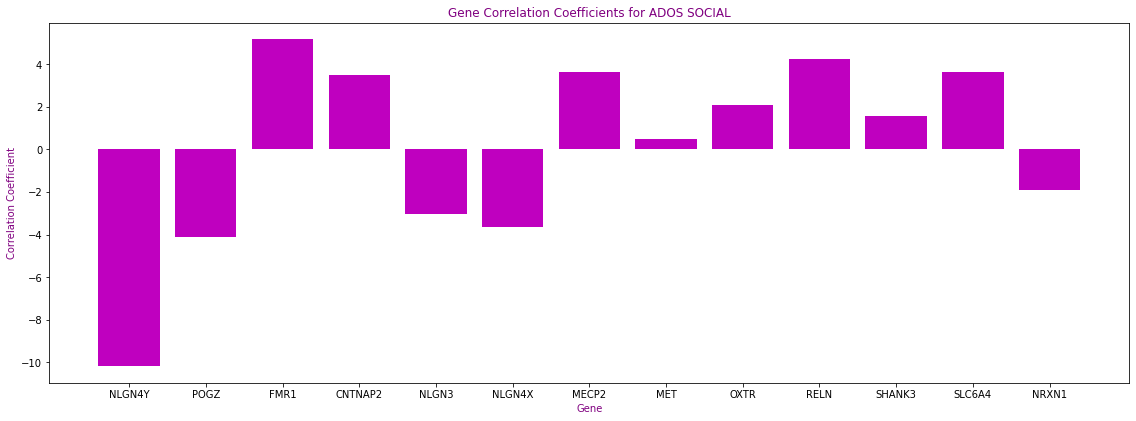

In [31]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_social,color='m')
plt.title('Gene Correlation Coefficients for ADOS SOCIAL',color='purple')
plt.ylabel('Correlation Coefficient',color='purple')
plt.xlabel('Gene',color='purple')
plt.show()

In [32]:
#correlation coefficents for ados_rrb
coefficient_rrb = regression_rrb.coef_
labels = ['NLGN4Y', 'POGZ', 'FMR1', 'CNTNAP2', 'NLGN3','NLGN4X', 'MECP2', 'MET', 'OXTR', 'RELN','SHANK3', 'SLC6A4', 'NRXN1']
print(column_rrb)
print()
for i in range(0,13):
    print(f'{labels[i]},{coefficient_rrb[i]}')

ados_rrb

NLGN4Y,-2.8869322783922113
POGZ,-2.847030619933946
FMR1,0.07752391434545994
CNTNAP2,0.3074055365213848
NLGN3,0.3232231403622317
NLGN4X,1.9006615653931531
MECP2,-1.163695193892065
MET,-1.2176954053367899
OXTR,0.7053037542222543
RELN,-0.5651829277978802
SHANK3,1.8234551122836002
SLC6A4,-0.5520593823887985
NRXN1,1.3601295030463723


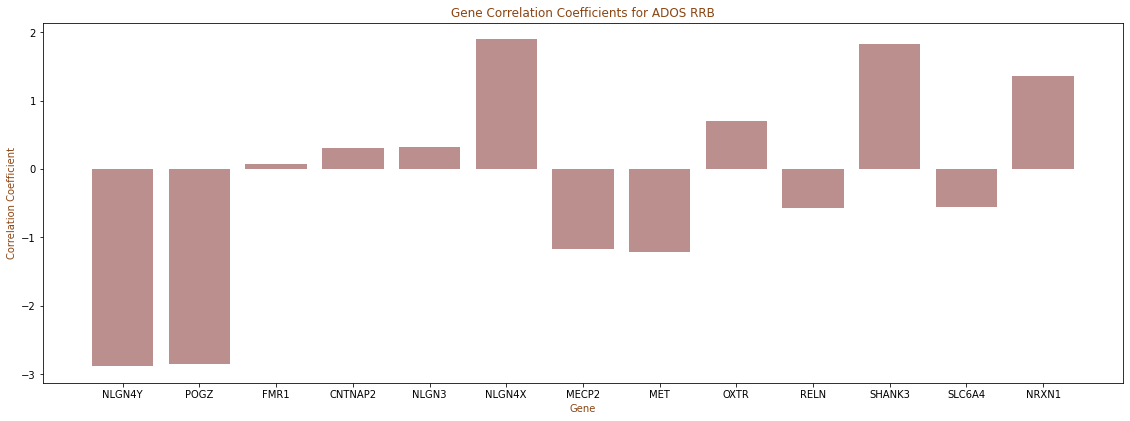

In [33]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
plt.bar(labels,coefficient_rrb,color='rosybrown')
plt.title('Gene Correlation Coefficients for ADOS RRB',color='saddlebrown')
plt.ylabel('Correlation Coefficient',color='saddlebrown')
plt.xlabel('Gene',color='saddlebrown')
plt.show()

In [40]:
#significance of coefficients for ados_total
print('ADOS_TOTAL')
X_total = X_use_total.copy()
Y_total = Y_use_total.copy()
X_total = sm.add_constant(X_total)
print(X_total.shape)
print(Y_total.shape)

est_total = sm.OLS(Y_total, X_total)
est2_total = est_total.fit()
print(est2_total.summary())

ADOS_TOTAL
(429, 14)
(429,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8694
Date:                Tue, 25 Oct 2022   Prob (F-statistic):              0.586
Time:                        12:41:22   Log-Likelihood:                -1184.0
No. Observations:                 429   AIC:                             2396.
Df Residuals:                     415   BIC:                             2453.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1972   

In [79]:
def plot_errorbar_from_table(est2_total,labels):
    coef_total = est2_total.params[1::]
    ci_total = est2_total.conf_int()[1::,:]
    ci_rel_total = abs(np.vstack((coef_total,coef_total)).transpose() - ci_total)
    ci_rel_total = ci_rel_total.transpose()
    xs_total = np.arange(len(coef_total))

    plt.figure(figsize=(15,5))
    plt.bar(xs_total,coef_total,color='peachpuff')
    plt.errorbar(xs_total,coef_total,ci_rel_total,fmt='r ',capsize=10,ecolor='saddlebrown')
    plt.xticks(xs_total,labels=labels);

Text(0.5, 0, 'Gene')

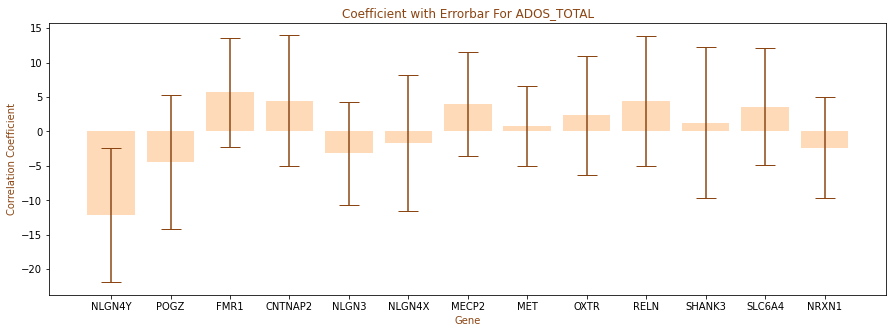

In [81]:
plot_errorbar_from_table(est2_total,labels)
plt.title('Coefficient with Errorbar For ADOS_TOTAL',color='saddlebrown')
plt.ylabel('Correlation Coefficient',color='saddlebrown')
plt.xlabel('Gene',color='saddlebrown')

In [43]:
#significance of coefficients for ados_comm
print('ADOS_COMM')
X_comm = X_use_comm.copy()
Y_comm = Y_use_comm.copy()
X_comm = sm.add_constant(X_comm)

est_comm = sm.OLS(Y_comm, X_comm)
est2_comm = est_comm.fit()
print(est2_comm.summary())

ADOS_COMM
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.4239
Date:                Tue, 25 Oct 2022   Prob (F-statistic):              0.961
Time:                        12:41:41   Log-Likelihood:                -771.78
No. Observations:                 411   AIC:                             1572.
Df Residuals:                     397   BIC:                             1628.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5180      0.112     31.51

In [82]:
def plot_errorbar_from_table(est2_comm,labels):
    coef_comm = est2_comm.params[1::]
    ci_comm = est2_comm.conf_int()[1::,:]
    ci_rel_comm = abs(np.vstack((coef_comm,coef_comm)).transpose() - ci_comm)
    ci_rel_comm = ci_rel_comm.transpose()
    xs_comm = np.arange(len(coef_comm))

    plt.figure(figsize=(15,5))
    plt.bar(xs_comm,coef_comm,color='mediumturquoise')
    plt.errorbar(xs_comm,coef_comm,ci_rel_comm,fmt='r ',capsize=10,ecolor='darkslategray')
    plt.xticks(xs_comm,labels=labels);

Text(0.5, 0, 'Gene')

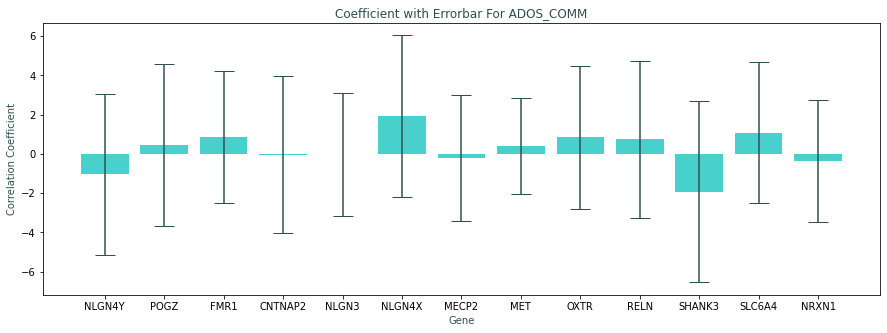

In [84]:
plot_errorbar_from_table(est2_comm,labels)
plt.title('Coefficient with Errorbar For ADOS_COMM',color='darkslategray')
plt.ylabel('Correlation Coefficient',color='darkslategray')
plt.xlabel('Gene',color='darkslategray')

In [46]:
#significance of coefficients for ados_social
print('ADOS_SOCIAL')
X_social = X_use_social.copy()
Y_social = Y_use_social.copy()
X_social = sm.add_constant(X_social)

est_social = sm.OLS(Y_social, X_social)
est2_social = est_social.fit()
print(est2_social.summary())

ADOS_SOCIAL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.386
Date:                Tue, 25 Oct 2022   Prob (F-statistic):              0.163
Time:                        12:42:22   Log-Likelihood:                -989.14
No. Observations:                 412   AIC:                             2006.
Df Residuals:                     398   BIC:                             2063.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5826      0.188     40.

In [85]:
def plot_errorbar_from_table(est2_social,labels):
    coef_social = est2_social.params[1::]
    ci_social = est2_social.conf_int()[1::,:]
    ci_rel_social = abs(np.vstack((coef_social,coef_social)).transpose() - ci_social)
    ci_rel_social = ci_rel_social.transpose()
    xs_social = np.arange(len(coef_social))

    plt.figure(figsize=(15,5))
    plt.bar(xs_social,coef_social,color='lightgreen')
    plt.errorbar(xs_social,coef_social,ci_rel_social,fmt='r ',capsize=10,ecolor='darkgreen')
    plt.xticks(xs_social,labels=labels);

Text(0.5, 0, 'Gene')

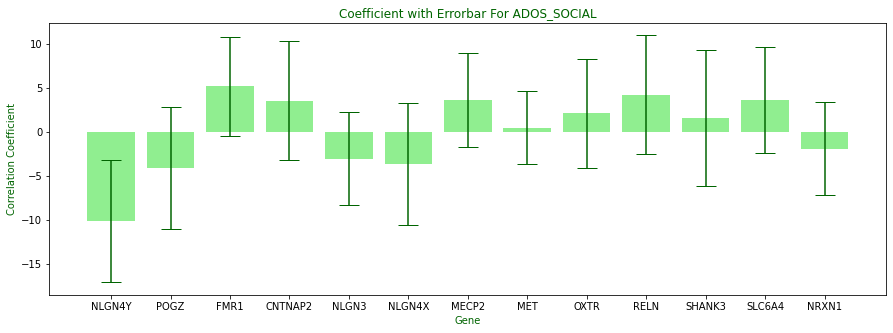

In [86]:
plot_errorbar_from_table(est2_social,labels)
plt.title('Coefficient with Errorbar For ADOS_SOCIAL',color='darkgreen')
plt.ylabel('Correlation Coefficient',color='darkgreen')
plt.xlabel('Gene',color='darkgreen')

In [49]:
#significance of coefficients for ados_rrb
print('ADOS_RRB')
X_rrb = X_use_rrb.copy()
Y_rrb = Y_use_rrb.copy()
X_rrb = sm.add_constant(X_rrb)

est_rrb = sm.OLS(Y_rrb, X_rrb)
est2_rrb = est_rrb.fit()
print(est2_rrb.summary())

ADOS_RRB
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.5828
Date:                Tue, 25 Oct 2022   Prob (F-statistic):              0.868
Time:                        12:42:59   Log-Likelihood:                -687.36
No. Observations:                 375   AIC:                             1403.
Df Residuals:                     361   BIC:                             1458.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8113      0.111     16.298

In [90]:
def plot_errorbar_from_table(est2_rrb,labels):
    coef_rrb = est2_rrb.params[1::]
    ci_rrb = est2_rrb.conf_int()[1::,:]
    ci_rel_rrb = abs(np.vstack((coef_rrb,coef_rrb)).transpose() - ci_rrb)
    ci_rel_rrb = ci_rel_rrb.transpose()
    xs_rrb = np.arange(len(coef_rrb))

    plt.figure(figsize=(15,5))
    plt.bar(xs_rrb,coef_rrb,color='cornflowerblue')
    plt.errorbar(xs_rrb,coef_rrb,ci_rel_rrb,fmt='r ',capsize=10,ecolor='midnightblue')
    plt.xticks(xs_rrb,labels=labels);

Text(0.5, 0, 'Gene')

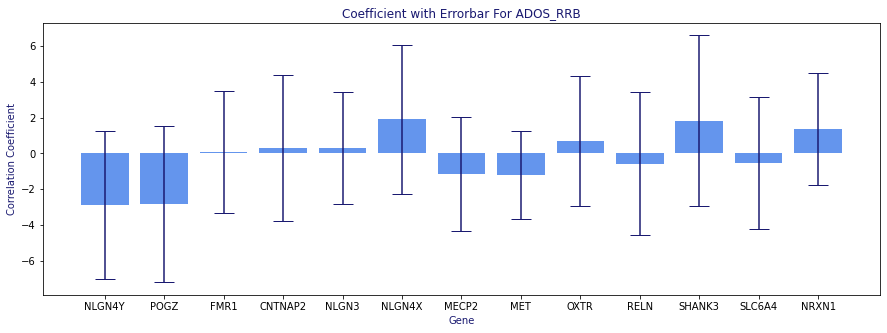

In [91]:
plot_errorbar_from_table(est2_rrb,labels)
plt.title('Coefficient with Errorbar For ADOS_RRB',color='midnightblue')
plt.ylabel('Correlation Coefficient',color='midnightblue')
plt.xlabel('Gene',color='midnightblue')